# Importing Dataset

In [3]:
import pandas as pd
import logging
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support
from transformers import BertTokenizer, BertForSequenceClassification
import torch
from torch.utils.data import DataLoader, Dataset
from torch.optim import AdamW
import torch.nn.functional as F
import numpy as np
import os
import matplotlib.pyplot as plt

# Suppress warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
# Suppress specific sklearn warnings
warnings.filterwarnings("ignore", category=UserWarning)
# Suppress the specific PyTorch warning about uninitialized weights
logging.getLogger("transformers.modeling_utils").setLevel(logging.ERROR)

# Loading Dataset

In [4]:
# Load the training and testing data
dataset1 = pd.read_csv('Tamil_test_data.csv')
dataset2 = pd.read_csv('Tamil_test_labels_data.csv')
dataset3 = pd.read_csv('Tamil_train_data.csv')
dataset4 = pd.read_csv('Tamil_valid_data.csv')

In [5]:
dataset1

,comments
0,அந்த தமிழன் ஒரு சாதிவெறி
1,இந்த வந்தேரிக்கு தகுந்த பாடம் கற்பிப்பார்கள் த...
2,எச்ச ராஜா நீ ஒரு மானங்கெட்ட தாயை விட நீ
3,பணம் இருக்கும் இடத்தில் கேட்பது தவறு இல்லை பண...
4,சக தோழியாக நினைத்து ஆதரவு தாருங்கள் நண்பர்களே!...
...,...
2551,Avanga sonanga pari 8:50 sema
2552,Bro Avanga great bro semma character antha akk...
2553,NAGENDRAN NAGA hii Ur watsapp number
2554,Nengal solvathu sari endral angalum kuda vethi...


In [6]:
dataset2

,tag,comments
0,Xenophobia,அந்த தமிழன் ஒரு சாதிவெறி
1,Xenophobia,இந்த வந்தேரிக்கு தகுந்த பாடம் கற்பிப்பார்கள் த...
2,Misandry,எச்ச ராஜா நீ ஒரு மானங்கெட்ட தாயை விட நீ
3,Counter-speech,பணம் இருக்கும் இடத்தில் கேட்பது தவறு இல்லை பண...
4,None-of-the-above,சக தோழியாக நினைத்து ஆதரவு தாருங்கள் நண்பர்களே!...
...,...,...
2554,None-of-the-above,Avanga sonanga pari 8:50 sema
2555,None-of-the-above,Bro Avanga great bro semma character antha akk...
2556,None-of-the-above,NAGENDRAN NAGA hii Ur watsapp number
2557,Counter-speech,Nengal solvathu sari endral angalum kuda vethi...


In [7]:
dataset3

,tag,comments
0,Hope-Speech,உங்கள் பேச்சை எதிர்பார்த்தேன். நல்ல விளக்கம் ...
1,None-of-the-above,எச். ராசாவால் இராமருக்கே இழிவு. இவர் எல்லாம் ...
2,None-of-the-above,கல்யாணம்னு வரும்போது தான் சாதி முக்கியம் எங்க...
3,None-of-the-above,Tentu Kottai ஐயா நான் தமிழ் இந்து.
4,Homophobia,Tamil selvan அடே தேவடியாவுக்கு பிரந்தவனே பச்ச...
...,...,...
8178,None-of-the-above,Noq day having no caste no religious certificate
8179,None-of-the-above,Mimicry escape aitaru bro. 😂
8180,None-of-the-above,Rajesh R u age u from
8181,Counter-speech,Bro unga videos nallarukku but don't do prank ...


In [8]:
dataset4

,tag,comments
0,None-of-the-above,மனைவியை விரும்பினால் சுவாரசியம் வரும்
1,Misogyny,மதுவாந்தி ஒரு கருங்காலி பெண்ணினத்திற்கே ஒரு அவ...
2,None-of-the-above,எச்ச.ராஜா ஓரு .........உங்கள் கருத்து........
3,None-of-the-above,பிராமின்ஸ்லையும் மனசாட்சி உள்ள ஒரு மனுஷன் இருக...
4,Misandry,Comedy எச்சில் ராஜா
...,...,...
2041,Transphobic,Va d 9 usu vinoth
2042,None-of-the-above,Love panuradhaaaa soliyaeeee cover panura niiii😂
2043,None-of-the-above,Bro part 2 aippa varum
2044,Misandry,jii innum nariya thetunga andha potta gopiya


In [9]:
#unique_tags_dataset1 = dataset1['tag'].unique()
unique_tags_dataset2 = dataset2['tag'].unique()
unique_tags_dataset3 = dataset3['tag'].unique()
unique_tags_dataset4 = dataset4['tag'].unique()

tag_counts_dataset2 = dataset2['tag'].value_counts()
tag_counts_dataset3 = dataset3['tag'].value_counts()
tag_counts_dataset4 = dataset4['tag'].value_counts()

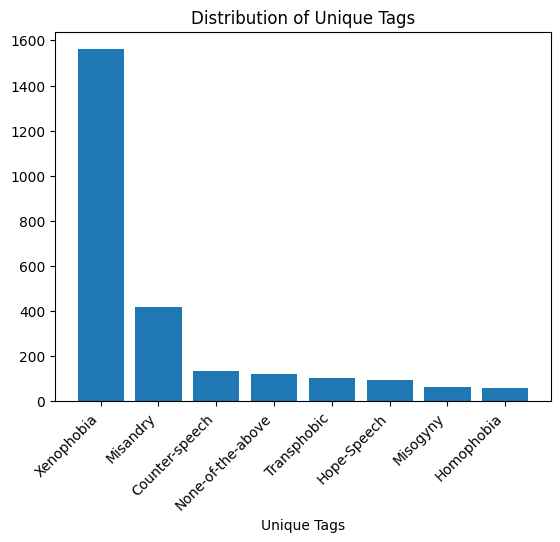

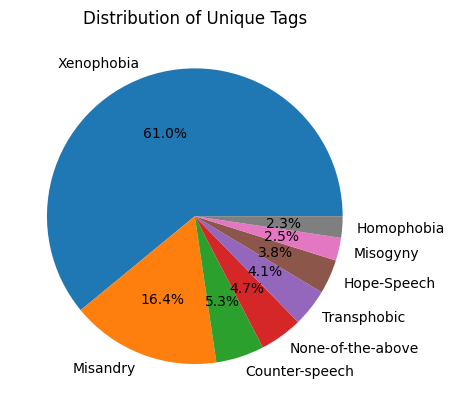

In [10]:
# Option 1: Bar Chart (for categorical data)
plt.bar(unique_tags_dataset2, tag_counts_dataset2)  # Use tag_counts if you want to visualize counts
plt.xlabel("Unique Tags")
plt.ylabel("Count" if 'tag_counts' in locals() else "")  # Adjust label if visualizing counts
plt.title("Distribution of Unique Tags")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for readability
plt.show()

# Option 2: Pie Chart (for categorical data with limited categories)
plt.pie(tag_counts_dataset2, labels=unique_tags_dataset2, autopct="%1.1f%%")  # Use tag_counts if visualizing counts
plt.title("Distribution of Unique Tags")
plt.show()

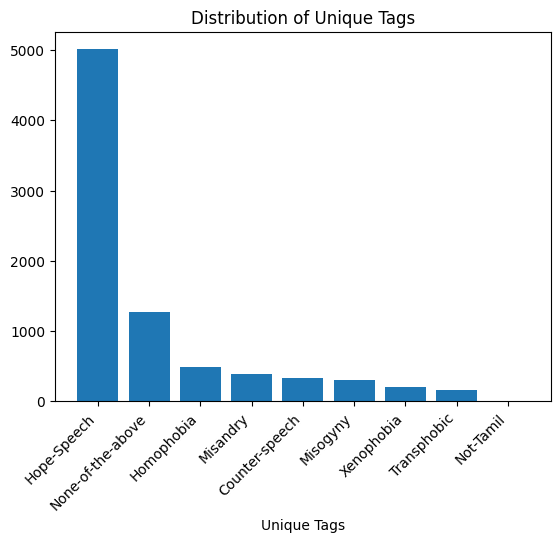

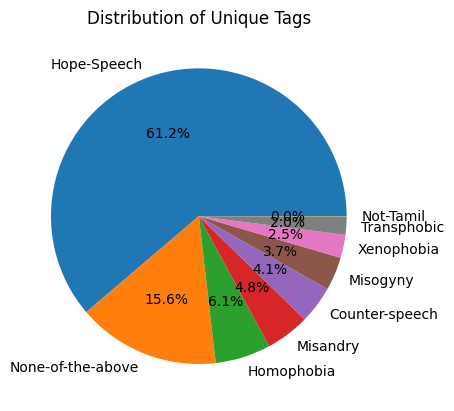

In [11]:
# Option 1: Bar Chart (for categorical data)
plt.bar(unique_tags_dataset3, tag_counts_dataset3)  # Use tag_counts if you want to visualize counts
plt.xlabel("Unique Tags")
plt.ylabel("Count" if 'tag_counts' in locals() else "")  # Adjust label if visualizing counts
plt.title("Distribution of Unique Tags")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for readability
plt.show()

# Option 2: Pie Chart (for categorical data with limited categories)
plt.pie(tag_counts_dataset3, labels=unique_tags_dataset3, autopct="%1.1f%%")  # Use tag_counts if visualizing counts
plt.title("Distribution of Unique Tags")
plt.show()

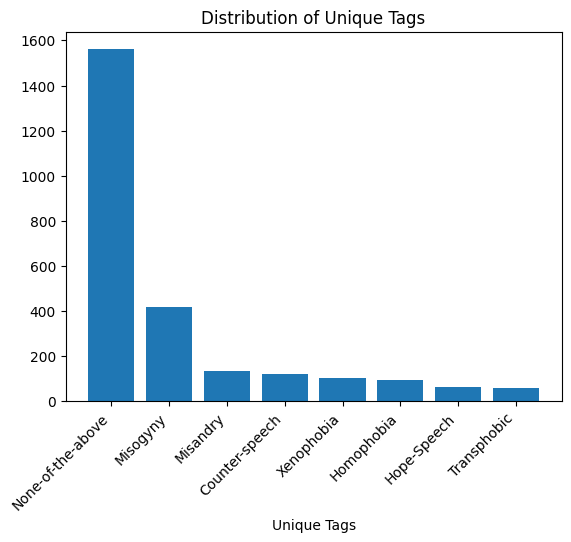

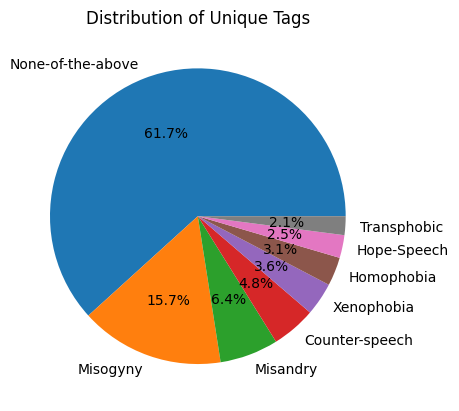

In [12]:
# Option 1: Bar Chart (for categorical data)
plt.bar(unique_tags_dataset4, tag_counts_dataset2)  # Use tag_counts if you want to visualize counts
plt.xlabel("Unique Tags")
plt.ylabel("Count" if 'tag_counts' in locals() else "")  # Adjust label if visualizing counts
plt.title("Distribution of Unique Tags")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for readability
plt.show()

# Option 2: Pie Chart (for categorical data with limited categories)
plt.pie(tag_counts_dataset4, labels=unique_tags_dataset4, autopct="%1.1f%%")  # Use tag_counts if visualizing counts
plt.title("Distribution of Unique Tags")
plt.show()

In [13]:
train_df=dataset2
test_df=dataset4

train_df=train_df.dropna()
test_df=test_df.dropna()

# Unique Labels in Train & Test

In [14]:
print(train_df['tag'].unique())
print('==================================')
print(test_df['tag'].unique())

['Xenophobia' 'Misandry' 'Counter-speech' 'None-of-the-above'
 'Transphobic' 'Hope-Speech' 'Misogyny' 'Homophobia']
['None-of-the-above' 'Misogyny' 'Misandry' 'Counter-speech' 'Xenophobia'
 'Homophobia' 'Hope-Speech' 'Transphobic']


# Find Size of Train & Test Data

In [15]:
print(len(train_df))
print(len(test_df))

2556
2046


# Label Encoding Sense Labels

In [16]:
# Encode labels
label_encoder = LabelEncoder()
train_df['tag'] = label_encoder.fit_transform(train_df['tag'])
test_df['tag'] = label_encoder.transform(test_df['tag'])

<ipython-input-16-65c2e1cc985e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['tag'] = label_encoder.fit_transform(train_df['tag'])


In [17]:
print(train_df['tag'].unique())
print(test_df['tag'].unique())

[7 3 0 5 6 2 4 1]
[5 4 3 0 7 1 2 6]


# Loading Bert Model

In [18]:
# Initialize BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')

In [19]:
# Tokenize the text
def tokenize_function(sentences):
    return tokenizer(sentences, padding=True, truncation=True, return_tensors="pt")

# Tokenize the training and testing texts
train_encodings = tokenize_function(train_df['comments'].tolist())
test_encodings = tokenize_function(test_df['comments'].tolist())

In [20]:
# Create a custom dataset class
class SentenceDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = SentenceDataset(train_encodings, train_df['tag'].tolist())
test_dataset = SentenceDataset(test_encodings, test_df['tag'].tolist())

In [21]:
# Load the BERT model
model = BertForSequenceClassification.from_pretrained('bert-base-multilingual-cased', num_labels=len(label_encoder.classes_))

# Setup Dataloaders

In [22]:
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False)

# Training Phase

In [23]:
"""device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)

optimizer = AdamW(model.parameters(), lr=5e-5)

def train(model, train_loader, optimizer, device):
    model.train()
    total_loss = 0
    for batch in train_loader:
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()
        loss.backward()
        optimizer.step()

    avg_loss = total_loss / len(train_loader)
    return avg_loss

# Train for 3 epochs
for epoch in range(1):
    avg_loss = train(model, train_loader, optimizer, device)
    print(f'Epoch {epoch+1}, Loss: {avg_loss}')"""

"device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')\nmodel.to(device)\n\noptimizer = AdamW(model.parameters(), lr=5e-5)\n\ndef train(model, train_loader, optimizer, device):\n    model.train()\n    total_loss = 0\n    for batch in train_loader:\n        optimizer.zero_grad()\n        input_ids = batch['input_ids'].to(device)\n        attention_mask = batch['attention_mask'].to(device)\n        labels = batch['labels'].to(device)\n        \n        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)\n        loss = outputs.loss\n        total_loss += loss.item()\n        loss.backward()\n        optimizer.step()\n    \n    avg_loss = total_loss / len(train_loader)\n    return avg_loss\n\n# Train for 3 epochs\nfor epoch in range(1):\n    avg_loss = train(model, train_loader, optimizer, device)\n    print(f'Epoch {epoch+1}, Loss: {avg_loss}')"

In [25]:
import time
from tqdm import tqdm

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)

optimizer = AdamW(model.parameters(), lr=5e-5)

def train(model, train_loader, optimizer, device):
    model.train()
    total_loss = 0
    start_time = time.time()  # Track training start time

    for batch_idx, batch in enumerate(tqdm(train_loader, desc="Training")):  # Use tqdm for progress bar
        optimizer.zero_grad()

        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        optimizer.step()

    avg_loss = total_loss / len(train_loader)
    end_time = time.time()  # Track training end time
    training_time = end_time - start_time

    # Log training stats (optional)
    with open("training_log.txt", "a") as f:  # Create/append to a log file
        f.write(f"Epoch {epoch+1}, Loss: {avg_loss:.4f}, Training Time: {training_time:.2f} seconds\n")

    return avg_loss

# Train for 3 epochs
for epoch in range(1):
    avg_loss = train(model, train_loader, optimizer, device)
    print(f'Epoch {epoch+1}, Loss: {avg_loss}')


Training: 100%|██████████| 639/639 [2:51:29<00:00, 16.10s/it]

Epoch 1, Loss: 1.3537810262473349


# Evaluation

In [26]:
def evaluate(model, data_loader, device):
    model.eval()
    preds, true_labels = [], []

    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            preds.extend(torch.argmax(logits, dim=1).cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    return np.array(true_labels), np.array(preds)

true_labels, preds = evaluate(model, test_loader, device)

# Compute Metrics

In [27]:
accuracy = accuracy_score(true_labels, preds)
precision, recall, f1, _ = precision_recall_fscore_support(true_labels, preds, average='macro')
classification_rep = classification_report(true_labels, preds)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print('Classification Report:')
print(classification_rep)

# Save the metrics to a CSV file
metrics = {
    'f1': f1,
    'recall': recall,
    'precision': precision,
    'accuracy': accuracy
}
metrics_df = pd.DataFrame([metrics])
#metrics_df.to_csv('evaluation_metrics.csv', index=False)

print(f"Metrics saved to evaluation_metrics.csv")

Accuracy: 0.6173020527859238
Precision: 0.07716275659824047
Recall: 0.125
F1 Score: 0.09542157751586583
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       131
           1       0.00      0.00      0.00        51
           2       0.00      0.00      0.00        64
           3       0.00      0.00      0.00       322
           4       0.00      0.00      0.00        74
           5       0.62      1.00      0.76      1263
           6       0.00      0.00      0.00        42
           7       0.00      0.00      0.00        99

    accuracy                           0.62      2046
   macro avg       0.08      0.12      0.10      2046
weighted avg       0.38      0.62      0.47      2046

Metrics saved to evaluation_metrics.csv


# End of Code